In [3]:
'''
Dựa trên tập data về mức tiêu thụ nhiên liệu của từng dòng xe, dự đoán mức sản sinh Co2 tương ứng
Dataset: FuelConsumptionCo2.csv
'''

'\nDựa trên tập data về mức tiêu thụ nhiên liệu của từng dòng xe, dự đoán mức sản sinh Co2 tương ứng\nDataset: FuelConsumptionCo2.csv\n'

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load and quick view data

In [5]:
data = pd.read_csv('FuelConsumptionCo2.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
# ? rows ? columns ? non-null ? type ? duplicate

In [7]:
data.shape

(1067, 13)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [9]:
data.duplicated().sum()

0

# Data Cleaning

In [10]:
data.select_dtypes('object').columns

Index(['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], dtype='object')

In [12]:
# Cách 1
# data[['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE']]= data[['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE']].astype('category')
# Cách 2
for c in data.select_dtypes('object').columns:
    data[c] = data[c].astype('category')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   MODELYEAR                 1067 non-null   int64   
 1   MAKE                      1067 non-null   category
 2   MODEL                     1067 non-null   category
 3   VEHICLECLASS              1067 non-null   category
 4   ENGINESIZE                1067 non-null   float64 
 5   CYLINDERS                 1067 non-null   int64   
 6   TRANSMISSION              1067 non-null   category
 7   FUELTYPE                  1067 non-null   category
 8   FUELCONSUMPTION_CITY      1067 non-null   float64 
 9   FUELCONSUMPTION_HWY       1067 non-null   float64 
 10  FUELCONSUMPTION_COMB      1067 non-null   float64 
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64   
 12  CO2EMISSIONS              1067 non-null   int64   
dtypes: category(5), float64(4), int64(4)
memory usag

# Descriptive Analysis

In [14]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [15]:
data.select_dtypes('category').describe()


,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
count,1067,1067,1067,1067,1067
unique,39,663,16,22,4
top,FORD,F150 FFV,MID-SIZE,A6,X
freq,90,8,178,222,514


![](https://upload.wikimedia.org/wikipedia/commons/0/0d/Distribution_of_Annual_Household_Income_in_the_United_States_2010.png)

https://www.youtube.com/watch?v=2oJldeE4JcU

https://www.youtube.com/watch?v=rzFX5NWojp0m

<Figure size 1008x720 with 0 Axes>

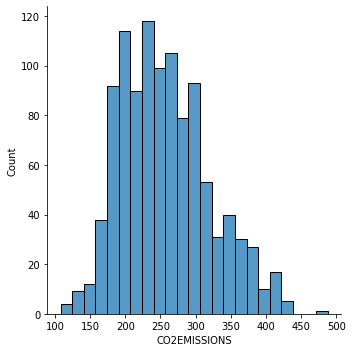

In [18]:
plt.figure(figsize = (14,10))
sns.displot(data = data['CO2EMISSIONS'])

In [ ]:
df_num = data.select_dtypes(exclude='category').drop('MODELYEAR',axis=1)
# Figure
fig = plt.figure(figsize=(10, 7))

# Define grid
ncols = 3
nrows = int(np.ceil(df_num.shape[1] / ncols))

# Add subplots
for i, c in enumerate(df_num.columns):
    ax = fig.add_subplot(nrows, ncols, i + 1)
    df_num[c].plot.hist(bins=50, ax=ax)
    ax.set_title(c)
    ax.set_ylabel(None)

# Other
plt.tight_layout()
plt.show()

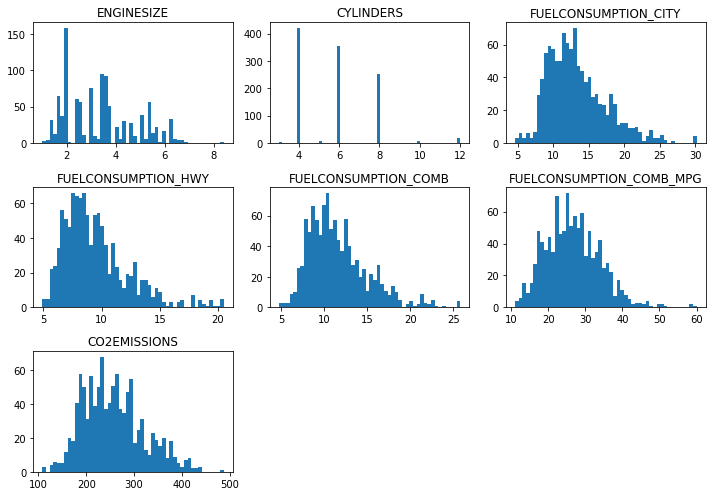

In [20]:
df_num = data.select_dtypes(exclude = 'category').drop('MODELYEAR',axis = 1)
# Figure
fig = plt.figure(figsize = (10,7))
# Define grid
ncols = 3
nrows = int(np.ceil(df_num.shape[1] / ncols))
# Add subplots
for i,c in enumerate(df_num.columns):
    ax = fig.add_subplot(nrows, ncols, i+1)
    df_num[c].plot.hist(bins = 50, ax = ax)
    ax.set_title(c)
    ax.set_ylabel(None)
# Others
plt.tight_layout()
plt.show()


<AxesSubplot:>

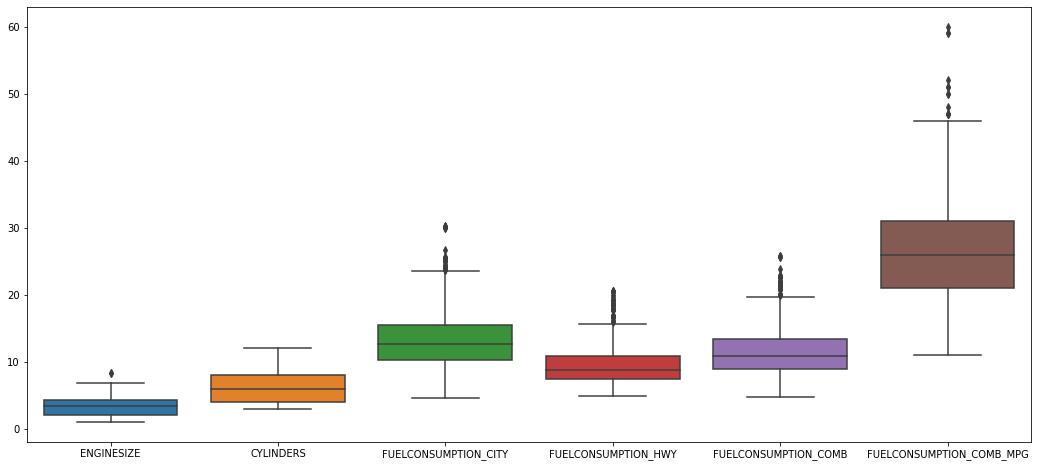

In [30]:
plt.figure(figsize = (18,8))
sns.boxplot(data = data.select_dtypes(exclude = 'category').drop(['MODELYEAR','CO2EMISSIONS'],axis = 1))

# Diagnostic Analysis

![](https://www.statisticshowto.com/wp-content/uploads/2012/10/pearson-2-small.png)

In [32]:
data.select_dtypes(exclude = 'category').corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


<AxesSubplot:>

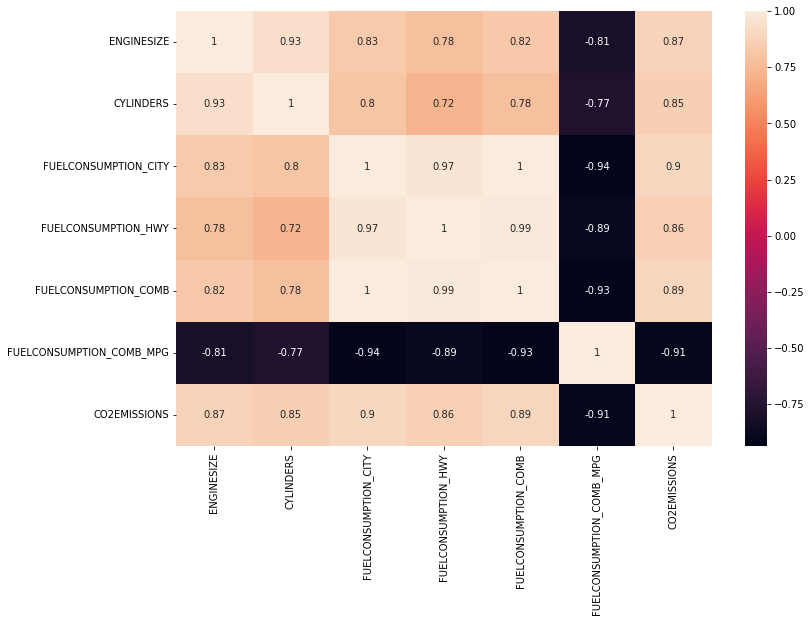

In [33]:
plt.figure(figsize = (12,8))
sns.heatmap(data.select_dtypes(exclude = 'category').drop('MODELYEAR',axis = 1).corr(), annot = True)

<AxesSubplot:xlabel='CO2EMISSIONS', ylabel='FUELCONSUMPTION_CITY'>

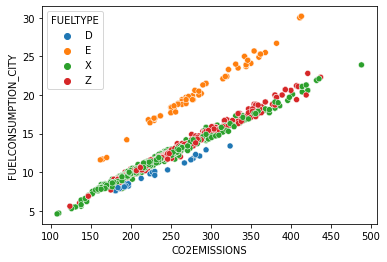

In [36]:
sns.scatterplot(data = data, x = 'CO2EMISSIONS', y = 'FUELCONSUMPTION_CITY' , hue = 'FUELTYPE')

# Feature Selection & Training

![](https://i1.wp.com/cmdlinetips.com/wp-content/uploads/2020/03/Linear_Regression_fit_with_Matrix_Multiplication.jpg?fit=594%2C396&ssl=1)

https://www.youtube.com/watch?v=iIUq0SqBSH0

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [40]:
data.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [43]:
model = LinearRegression ()
model.fit(data[['ENGINESIZE']], data['CO2EMISSIONS'])

LinearRegression()

In [45]:
model.coef_

array([39.12519979])

In [47]:
model.intercept_

125.3040994953569

In [50]:
results = pd.DataFrame(model.predict(data[['ENGINESIZE']]))
results

,0
0,203.554499
1,219.204579
2,183.991899
3,262.242299
4,262.242299
...,...
1062,242.679699
1063,250.504739
1064,242.679699
1065,250.504739


![](https://community.cloudera.com/t5/image/serverpage/image-id/25068iFF075A5AEC3B8528/image-size/medium?v=v2&px=400)

In [ ]:
mean_absolute_error, mean_squared_error, r2_score

![](https://i.imgur.com/19LNbyQ.jpeg)

![](https://pbs.twimg.com/media/FAX6eHvWEAIWBjB.png)

![](https://vitalflux.com/wp-content/uploads/2019/07/R-squared-formula-function-of-SSR-and-SST.jpg)

In [51]:
mean_absolute_error (data['CO2EMISSIONS'], results)

23.346887834400427

In [52]:
mean_squared_error(data['CO2EMISSIONS'], results)

946.3140527188749

In [54]:
r2_score (data['CO2EMISSIONS'], results)

0.7641458597854816

# Evaluation

![](https://spidec.files.wordpress.com/2017/05/fittings.jpg?w=702)

**Evaluation methods**
- Train - test
- Train - val - test
-> `train_test_split()`
- K-fold cross validation (K=5, 10, ...)
![](https://baoboitoithuong.com/cross-validation-la-gi/imager_2_3182_700.jpg)

In [55]:
from sklearn.model_selection import KFold, cross_val_score

In [58]:
X_train, X_test, y_train, y_test = train_test_split(data[['ENGINESIZE']], data['CO2EMISSIONS'], test_size = 0.2, shuffle = True, random_state = 42)
fold = KFold(n_splits = 5, shuffle = True, random_state = 42)
cross_val_score (LinearRegression() , X_train, y_train, scoring = 'r2' , cv = fold)

array([0.72508571, 0.74330385, 0.78385585, 0.76907905, 0.77848554])

# Tuning

In [59]:
model1 = LinearRegression ()
model1.fit(data[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_CITY']], data['CO2EMISSIONS'])

LinearRegression()

In [61]:
results1 = pd.DataFrame(model1.predict(data[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_CITY']]))
results1

,0
0,201.035207
1,216.519119
2,162.568931
3,254.263372
4,249.223006
...,...
1062,254.439897
1063,255.041336
1064,254.439897
1065,252.521153


In [62]:
r2_score (data['CO2EMISSIONS'], results1)

0.8627973904839377

In [68]:
X_train, X_test, y_train, y_test = train_test_split(data.select_dtypes(exclude ='category').drop(['MODELYEAR','CO2EMISSIONS'], axis = 1), data['CO2EMISSIONS'], test_size = 0.2, shuffle = True, random_state = 42)

In [ ]:
'''
Optimize model
GridsearchCV
'''

In [69]:
from sklearn.feature_selection import RFE # Recursive Feature Elimination
from sklearn.model_selection import GridSearchCV

In [70]:
# Create k fold
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

# Range to tune
hyper_params = [{'n_features_to_select': list(range(1,10))}]

# Specify model
model1 = LinearRegression()
model1.fit (X_train, y_train)
rfe = RFE(model1)
# Tuning with GridSearchCV
model_cv = GridSearchCV(estimator = rfe,
                       param_grid = hyper_params,
                       scoring = 'r2',
                       cv = folds,
                       return_train_score=True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
             return_train_score=True, scoring='r2', verbose=1)

In [73]:
finalresult = pd.DataFrame(model_cv.cv_results_)
finalresult.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_features_to_select', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

/Users/bo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/bo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='param_n_features_to_select', ylabel='mean_train_score'>

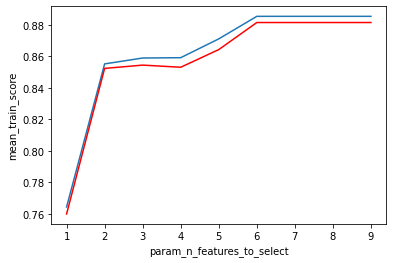

In [75]:
sns.lineplot(finalresult['param_n_features_to_select'],finalresult['mean_train_score'])
sns.lineplot(finalresult['param_n_features_to_select'],finalresult['mean_test_score'], color = 'red')